In [1]:
# 使用sklearn实现线性回归
from sklearn import linear_model
import numpy as np

x=np.linspace(-3,3,50)
y=2*x+1+np.random.rand(50)

x=[[i] for i in x]
y=[[i] for i in y]
x_=[[1],[2]]
y_=[[3],[5]]

model=linear_model.LinearRegression()
model.fit(x,y)

print(model.predict(x_))
print(model.coef_)
print(model.intercept_)

[[3.47644394]
 [5.42543231]]
[[1.94898838]]
[1.52745556]


In [11]:
# 批量梯度下降法实现线性回归
import matplotlib.pyplot as plt
import GDoptimizer
class myLinearRegression:
    def __init__(self,learning_rate=0.01,num_iterations=50,batch_size=16):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size=batch_size
        self.weights=None
        self.bias=None

    def fit(self, X, y):
        loss_his = []
        optimizer = GDoptimizer.AdaGrad()
        num_samples, num_features = X.shape
        self.weights=np.random.rand(num_features)
        self.bias = np.random.rand()
        for iter in range(self.num_iterations):
            # 抽取batch
            mask = np.random.choice(num_samples,self.batch_size)
            batch_X=X[mask]
            batch_y=y[mask]

            dw, db = self.gradient(batch_X,batch_y)

            # dw = np.dot(batch_X.T,(y_pred-batch_y))/self.batch_size
            # db = np.sum(y_pred-batch_y)/self.batch_size

            # self.weights -= self.learning_rate*dw
            # self.bias-=self.learning_rate*db
            optimizer.update(self.weights, self.bias, dw, db)

            if iter%10 ==0:
                loss_his.append(self.loss(X,y))
        
        # x = [i for i in range(1,len(loss_his)+1)]
        x = np.arange(1,len(loss_his)+1)
        loss_his = np.array(loss_his)
        plt.plot(x,loss_his,label='training_loss')
        plt.legend()
        plt.title('training_loss')
        plt.show()


    
    def predict(self,X):
        return np.dot(X,self.weights)+self.bias
    
    def loss(self,data,label):
        pred = self.predict(data)
        # print(pred.shape)
        # print(label.shape)
        delta = pred-label 
        loss = 0.5*np.dot(delta.T,delta)
        return loss

    def gradient(self,x,t):
        y = self.predict(x)
        dw = np.dot(x.T,(y-t))/self.batch_size
        db = np.sum(y-t)/self.batch_size
        return dw,db



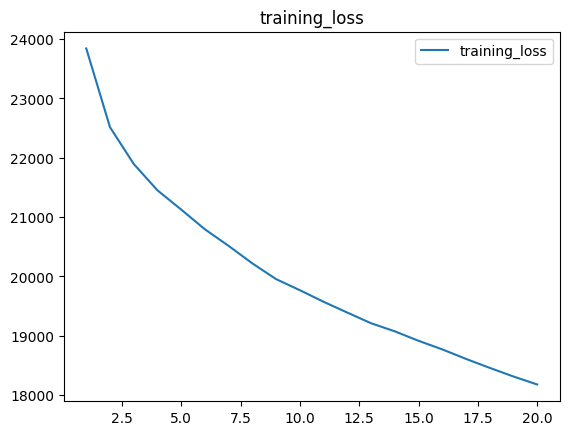

[-3  0 13 15  4  3  2 16  5  7]
[ 6.90755547  4.2682818  10.99516388  6.2730525  11.80495777  3.60651894
 10.20637578 10.13197935  5.20143034  3.44191456]
186.16045617317602


In [12]:
#实验
import random

#构造数据
x = [[random.randint(1,10) for i in range(3)] for j in range(800)]
# 2*x1-x3+2
y = [2*arr[0]-arr[2]+2 for arr in x]
x=np.array(x)
y=np.array(y)

# 模型
model=myLinearRegression(num_iterations=200)
model.fit(x,y)

# 测试
x_ = [[random.randint(1,10) for i in range(3)] for j in range(10)]
x_=np.array(x_)
y_ = [2*arr[0]-arr[2]+2 for arr in x_]
y_ = np.array(y_)
y_pred = model.predict(x_)
print(y_)
print(y_pred)

#计算测试损失
# loss = y_-y_pred
# loss = loss*loss
# loss = loss.sum()
# print(loss)

loss = model.loss(x_,y_)
print(loss)


使用world-happiness-report数据集进行实验

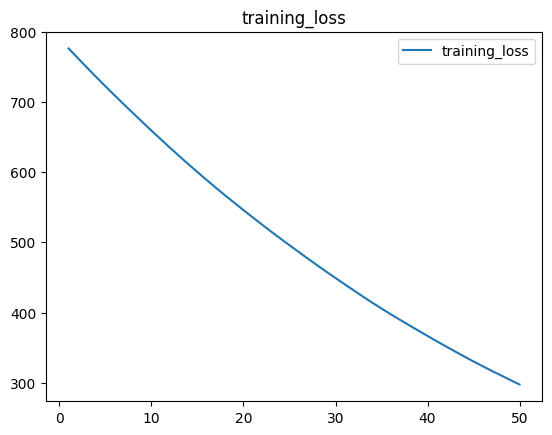

107.9027106681222
[1.00977748 0.79915907 0.9578191  0.83746871 0.75841255 1.0060501 ]


In [4]:
import pandas as pd
# 导入数据
data = pd.read_csv('dataset/world-happiness-report.csv')

train_data = data.sample(frac=0.75)
test_data=data.drop(train_data.index)

input_param_index = ['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
output_param_index = 'Happiness score'

x_train = [train_data[x].values for x in input_param_index]
x_train = np.array(x_train)
for i in range(x_train.shape[0]):
    x_train[i] = (x_train[i]-np.min(x_train[i]))/(np.max(x_train[i])-np.min(x_train[i]))
x_train = x_train.T

x_test = [test_data[x].values for x in input_param_index]
x_test = np.array(x_test)
for i in range(x_test.shape[0]):
    x_test[i] = (x_test[i]-np.min(x_test[i]))/(np.max(x_test[i])-np.min(x_test[i]))
x_test = x_test.T

y_train = train_data[output_param_index].values
y_test = test_data[output_param_index].values


    
learning_rate = 0.001
num_iterations = 500
batch_size = 32
model = myLinearRegression(learning_rate, num_iterations, batch_size)
model.fit(x_train,y_train)
loss = model.loss(x_test, y_test)
print(loss)
print(model.weights)

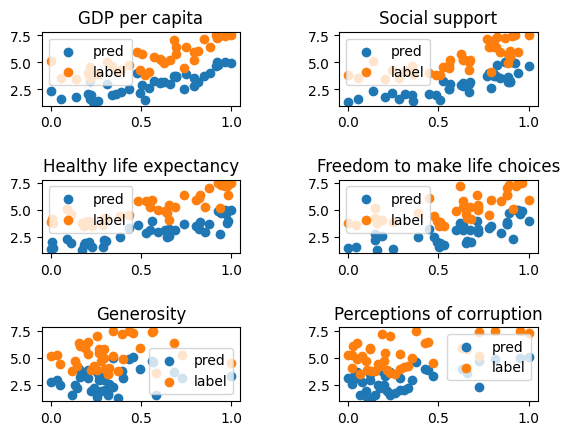

In [5]:
y_pred = model.predict(x_test)
x_data = x_test.T
fig, ax = plt.subplots(3,2)
fig.subplots_adjust(hspace=1, wspace=0.5)
for i in range(0,3):
    for j in range(0,2):
        index = i*2+j
        ax[i][j].set_title(input_param_index[index])
        ax[i][j].scatter(np.sort(x_data[index]),y_pred[np.argsort(x_data[index])],label='pred')
        ax[i][j].scatter(x_data[index],y_test,label='label')
        ax[i][j].legend()


In [6]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
# 创建原始特征
X = np.array([[1, 2],
              [3, 4],
              [5, 6]])
# 创建PolynomialFeatures对象
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# 将原始特征转换为多项式特征
X_poly = poly.fit_transform(X)
print(X_poly)

[[ 1.  2.  1.  2.  4.]
 [ 3.  4.  9. 12. 16.]
 [ 5.  6. 25. 30. 36.]]
